In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.util import ngrams
from string import punctuation
import re
from tqdm import tqdm_notebook
import numpy as np

## Preprocesamiento

In [2]:
df = pd.read_csv('productos_joma.csv',index_col=0,names=["title"])

In [3]:
correcciones = {
    "plafã³n": "plafon",
    "inalã¡mbrico": "inalambrico"
}

In [4]:
def remove_punctuation(s):
    s = s.translate(str.maketrans('', '', punctuation))
    return re.sub(' +', ' ',s) #saco espacios repetidos

In [5]:
sws = stopwords.words("spanish")

NameError: name 'stopwords' is not defined

In [ ]:
def get_keywords(s):
    kws = []
    s = remove_punctuation(s.lower())
    for w in s.split():
        if w not in sws: kws.append(correcciones.get(w,w))
    return kws

In [6]:
df["keywords"] = df.title.apply(get_keywords)

NameError: name 'get_keywords' is not defined

In [8]:
n = 2

In [9]:
df[f"{n}-grams"] = df.keywords.apply(lambda kws: list([" ".join(x) for x in ngrams(kws,n)]))

In [10]:
df

,title,keywords,2-grams
0,calefactor de patio piramide daewoo,"[calefactor, patio, piramide, daewoo]","[calefactor patio, patio piramide, piramide da..."
1,calefactor de patio hongo daewoo,"[calefactor, patio, hongo, daewoo]","[calefactor patio, patio hongo, hongo daewoo]"
2,estufa garrafera daewoo,"[estufa, garrafera, daewoo]","[estufa garrafera, garrafera daewoo]"
3,estufa cuarzo 1200w vertical reforzada,"[estufa, cuarzo, 1200w, vertical, reforzada]","[estufa cuarzo, cuarzo 1200w, 1200w vertical, ..."
4,estufa halogena 1200w con giro 3 tubos gacyf,"[estufa, halogena, 1200w, giro, 3, tubos, gacyf]","[estufa halogena, halogena 1200w, 1200w giro, ..."
5,caloventor 1800w azul/naranja (azul),"[caloventor, 1800w, azulnaranja, azul]","[caloventor 1800w, 1800w azulnaranja, azulnara..."
6,caloventor 1800w azul/naranja (naranja),"[caloventor, 1800w, azulnaranja, naranja]","[caloventor 1800w, 1800w azulnaranja, azulnara..."
7,split digital c/visor de temperatura 2000w,"[split, digital, cvisor, temperatura, 2000w]","[split digital, digital cvisor, cvisor tempera..."
8,aire acondicionado portatil 3500w frio/calor,"[aire, acondicionado, portatil, 3500w, friocalor]","[aire acondicionado, acondicionado portatil, p..."
9,pava electrica acero inox indelplas,"[pava, electrica, acero, inox, indelplas]","[pava electrica, electrica acero, acero inox, ..."


## Obtener trends

In [11]:
from pytrends.request import TrendReq

In [12]:
to_search = set()
for l in df[f"{n}-grams"]:
    [to_search.add(x) for x in l]

In [13]:
pytrend = TrendReq(hl='es-AR')

In [14]:
pytrend.build_payload(
    kw_list=["escritorio 1079"],
    cat=11,
    timeframe='today 3-m',
    geo='AR'
)

In [15]:
# AR-C es capital y AR-B es provincia de buenos aires

In [16]:
data = pytrend.interest_over_time()

In [17]:
data.empty

True

In [18]:
def is_relevant(data):
    # se define como relevante si al menos 50% de las filas son != 0
    if not data.empty:
        ratio = (data[data.columns[0]] != 0).sum()/len(data)
        return ratio >= 0.5
    return False

In [19]:
results = []
for w in tqdm_notebook(to_search):
    pytrend.build_payload(kw_list=[w],
         cat=11,
         timeframe='today 3-m',
         geo='AR'
    )
    data = pytrend.interest_over_time()
    if is_relevant(data): results.append(data.drop("isPartial",axis=1))
data = pd.concat(results,axis=1)

In [21]:
data

,aluminio blanco,luces led,caja herramientas,aplique pared,lampara mesa,atornillador bateria,pava electrica,estufa cuarzo,lampara escritorio,estufa garrafera,...,estufa halogena,control remoto,mesa ratona,lijadora orbital,aluminio negro,plafon led,soldadora inverter,cocina 2,ducha electrica,lijadora banda
date,,,,,,,,,,,,,,,,,,,,,
2020-05-10,58,67,37,42,0,23,0,0,33,43,...,0,36,58,49,48,29,61,48,44,29
2020-05-11,23,65,17,0,0,18,32,29,0,25,...,20,19,30,20,38,23,48,38,23,45
2020-05-12,48,61,24,34,36,18,0,30,27,26,...,0,39,24,48,39,59,55,40,32,46
2020-05-13,24,72,54,34,54,19,26,46,27,27,...,22,0,24,24,40,36,32,40,24,47
2020-05-14,36,77,46,0,55,37,0,0,27,27,...,22,50,48,38,0,48,51,0,32,36
2020-05-15,33,58,28,35,0,26,52,31,84,55,...,22,61,66,39,41,25,42,0,37,24
2020-05-16,29,72,22,0,0,23,31,75,0,33,...,53,0,29,33,0,59,59,73,30,43
2020-05-17,30,88,68,0,45,35,32,38,34,33,...,0,25,30,20,50,30,63,83,0,39
2020-05-18,47,80,24,34,36,18,37,30,26,0,...,0,19,23,47,39,24,58,39,24,61


In [22]:
data.to_csv('datos_gt_joma.csv')

## Analisis

In [23]:
intervals = [60,30,15,7]

### Promedio

In [24]:
def get_means(data,days):
    s = data.apply(lambda s: s[-days:].mean())
    s.name = f"{days}_day_mean"
    return s

In [25]:
pd.concat((get_means(data,days) for days in intervals),axis=1)

,60_day_mean,30_day_mean,15_day_mean,7_day_mean
aluminio blanco,36.033333,34.166667,31.600000,24.000000
luces led,64.566667,66.400000,70.266667,61.428571
caja herramientas,34.066667,35.100000,33.733333,42.142857
aplique pared,32.100000,40.400000,45.800000,33.428571
lampara mesa,37.283333,37.500000,36.600000,36.857143
atornillador bateria,24.016667,23.433333,19.400000,20.714286
pava electrica,24.333333,26.566667,27.133333,21.714286
estufa cuarzo,33.233333,28.300000,19.933333,16.142857
lampara escritorio,25.550000,28.600000,21.400000,16.714286
estufa garrafera,34.533333,28.000000,25.866667,13.142857


### Tendencias

#### Scoring

In [40]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [41]:
def get_slope(series,days):
    # Pendiente de la recta que mejor ajusta los puntos de los ultimos {days} dias
    model = LinearRegression()
    X = np.array(range(days)).reshape(-1, 1) # 0,1..{days-1}
    y = series[-days:]
    model.fit(X,y)
    return model.coef_[0]

In [42]:
def get_scores(data,days):
    s = data.apply(lambda s: get_slope(s,days))
    s.name = f"{days}_day_score"
    return s

In [43]:
results = []
for days in intervals:
    results.append(get_scores(data,days))
scores = pd.concat(results,axis=1)

In [78]:
def get_final_score(row):
    # promedio ponderado de los scores para cada intervalo de tiempo
    return (0.3*row["60_day_score"] + 0.3*row["30_day_score"] + 0.3*row["15_day_score"] + 0.1*row["7_day_score"])/4

In [79]:
scores["final"] = scores.apply(get_final_score,axis=1)

In [80]:
scores.sort_values("final",ascending=False)

,60_day_score,30_day_score,15_day_score,7_day_score,final
control remoto,-0.140094,-0.648276,1.432143,5.571429,0.187569
lijadora orbital,0.165546,0.192436,0.525000,3.428571,0.151938
amoladora angular,-0.004779,0.344605,1.242857,0.964286,0.142808
taladro percutor,0.188525,0.225806,-0.182143,2.392857,0.077236
pava electrica,0.197666,0.048276,-0.457143,3.214286,0.064517
lampara escritorio,-0.000528,-0.876974,-0.514286,6.607143,0.060794
mesa ratona,-0.102528,-0.054283,-0.067857,2.071429,0.034936
cocina 2,-0.134954,0.172414,0.935714,-1.821429,0.027452
caja herramientas,-0.028341,0.091880,1.203571,-5.750000,-0.048717
atornillador bateria,-0.139289,-0.428254,0.253571,-1.321429,-0.056584


#### Plot

In [73]:
ej = data["lijadora orbital"]

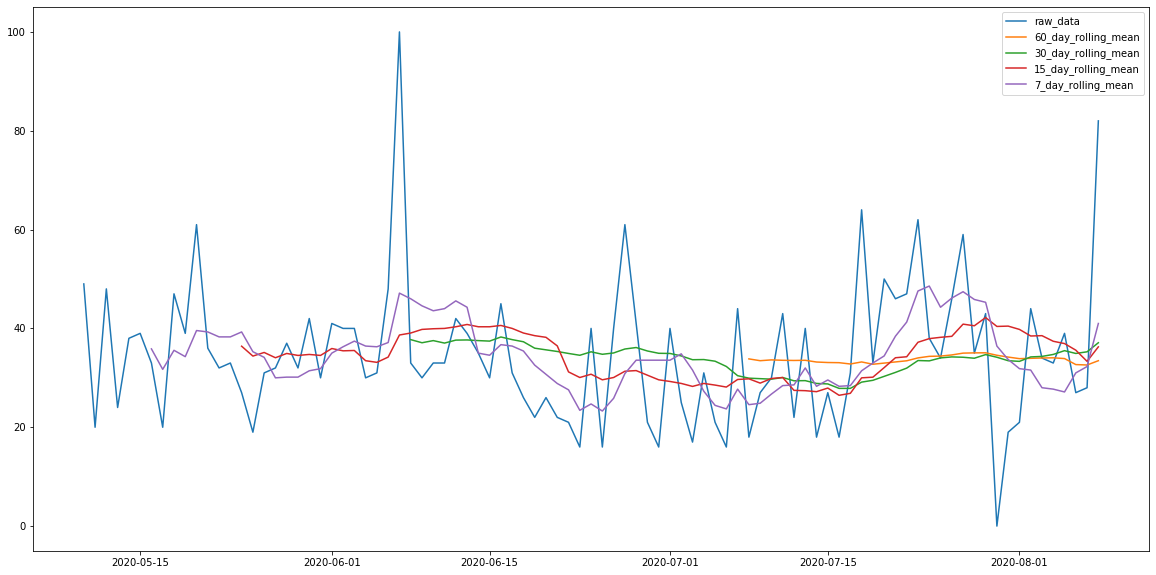

In [74]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(ej,label="raw_data")
for d in intervals: ax.plot(ej.rolling(d).mean(),label=f"{d}_day_rolling_mean")
plt.legend()
plt.show()

In [75]:
ej = data["plafon led"]

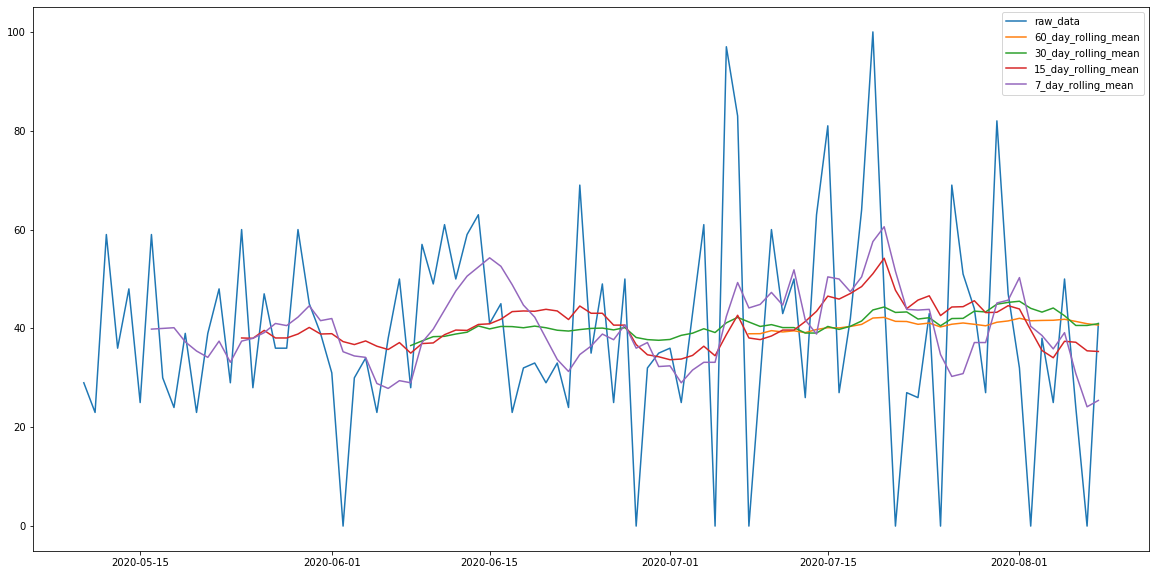

In [76]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(ej,label="raw_data")
for d in intervals: ax.plot(ej.rolling(d).mean(),label=f"{d}_day_rolling_mean")
plt.legend()
plt.show()

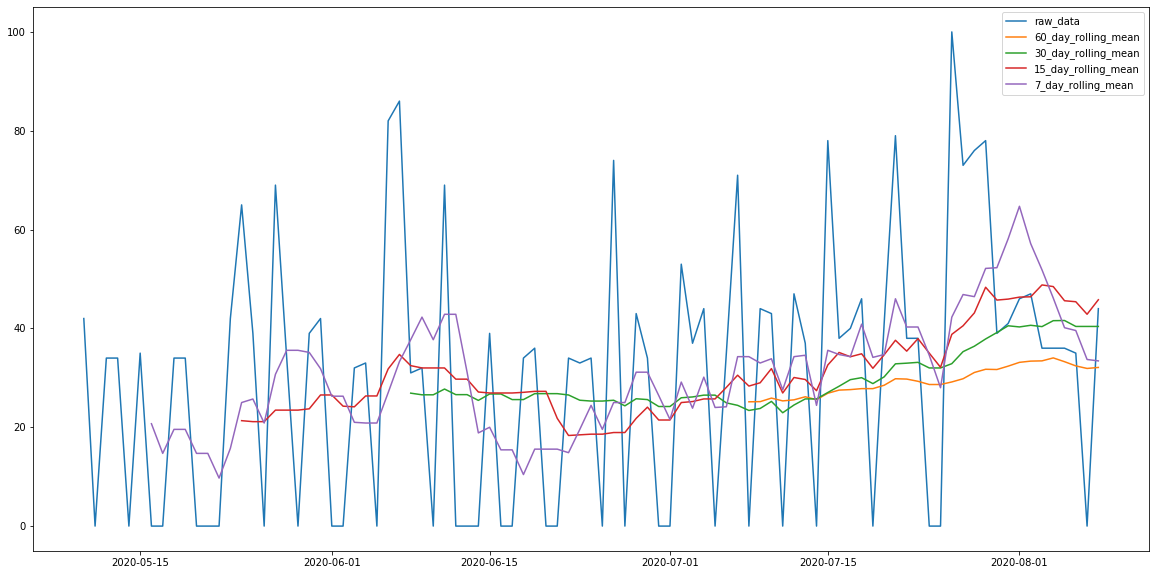

In [77]:
ej = data["aplique pared"]

fig,ax = plt.subplots(figsize=(20,10))
ax.plot(ej,label="raw_data")
for d in intervals: ax.plot(ej.rolling(d).mean(),label=f"{d}_day_rolling_mean")
plt.legend()
plt.show()